In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Encode target variable (diagnosis: M=1, B=0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Drop ID column as it's not a feature
df.drop('id', axis=1, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
feature_cols = df.columns.drop('diagnosis')
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save cleaned dataset
df.to_csv('Breast_Cancer_Cleaned.csv', index=False)
print('\nCleaned Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

Summary Statistics:
        diagnosis   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  569.000000  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean     0.372583 -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std      0.483918  1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min      0.000000 -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%      0.000000 -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%      0.000000 -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%      1.000000  4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max      1.000000  3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00   

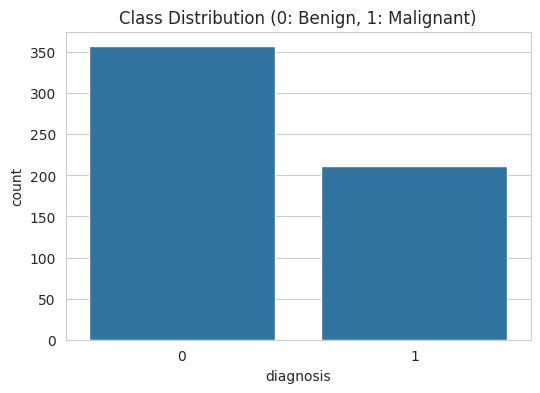

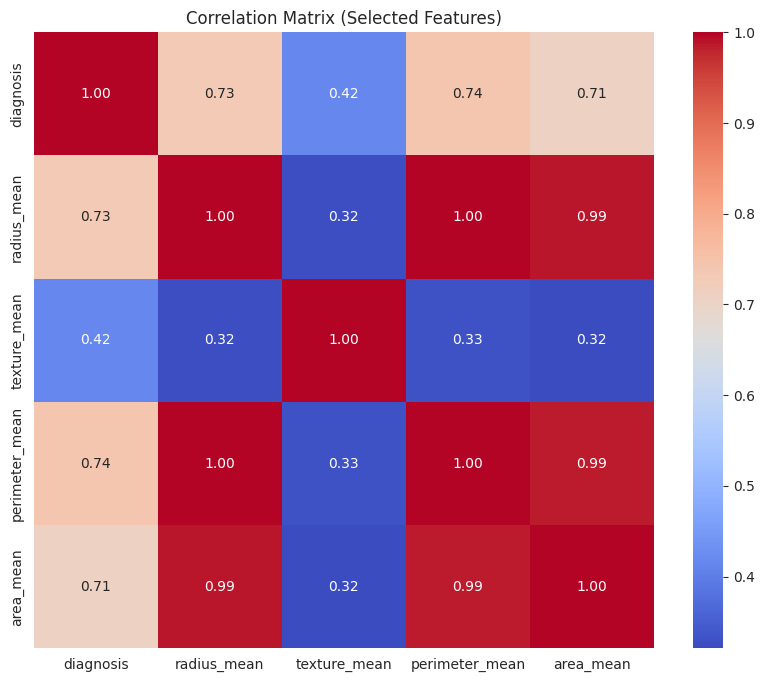

In [3]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution (0: Benign, 1: Malignant)')
plt.savefig('class_distribution.png')
plt.show()

# Correlation matrix (select subset of features for visualization)
plt.figure(figsize=(10, 8))
corr_matrix = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Features)')
plt.savefig('correlation_matrix.png')
plt.show()

In [5]:
# Prepare data
X = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

Confusion Matrix:
[[70  1]
 [ 2 41]]

Model Metrics:
Precision: 0.9762
Recall: 0.9535
ROC-AUC: 0.9974


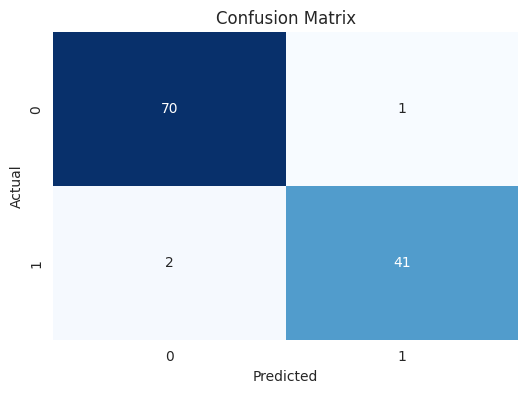

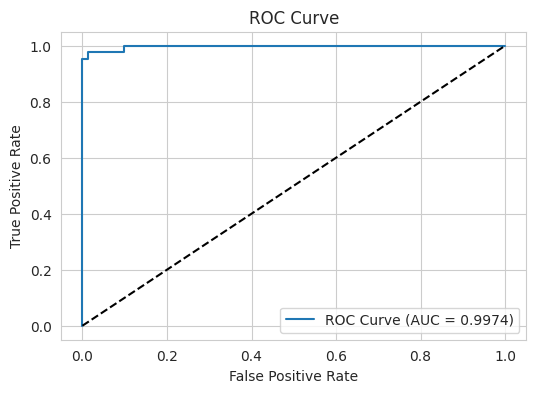

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('\nModel Metrics:')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

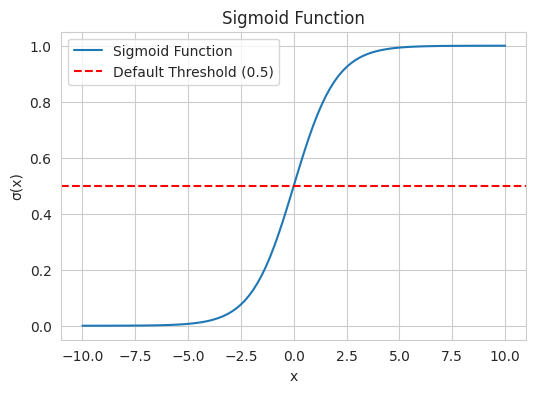


Metrics at Different Thresholds:
Threshold: 0.3
Precision: 0.9130
Recall: 0.9767
---
Threshold: 0.5
Precision: 0.9762
Recall: 0.9535
---
Threshold: 0.7
Precision: 1.0000
Recall: 0.9535
---


In [7]:
# Define sigmoid function for visualization
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot sigmoid function
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(6, 4))
plt.plot(x, sigmoid(x), label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.axhline(0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.legend()
plt.savefig('sigmoid_function.png')
plt.show()

# Threshold tuning
thresholds = [0.3, 0.5, 0.7]
print('\nMetrics at Different Thresholds:')
for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f'Threshold: {thresh}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print('---')